In [56]:
import keras
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D

In [57]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [58]:
num_classes = 10

In [59]:
x_train = x_train.reshape(-1, 784).astype('float32')
x_test = x_test.reshape(-1, 784).astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


In [63]:
model = Sequential([
    Dense(512, input_shape=(784,)),
    Activation('sigmoid'),
    Dense(256),
    Activation('sigmoid'),
    Dense(10),
    Activation('softmax'),
])

In [64]:
model.reset_states() 
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [65]:
model.reset_states()
# Train the model, iterating on the data in batches of 32 samples
training_history = model.fit(x_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
60000/60000 [==============================] - ETA: 0s - loss: 0.4103 - acc: 0.881 - 16s 260us/step - loss: 0.4101 - acc: 0.8812
Epoch 2/10
60000/60000 [==============================] - 16s 260us/step - loss: 0.1763 - acc: 0.9470
Epoch 3/10
60000/60000 [==============================] - 13s 221us/step - loss: 0.1195 - acc: 0.9640
Epoch 4/10
60000/60000 [==============================] - 14s 241us/step - loss: 0.0870 - acc: 0.9739
Epoch 5/10
60000/60000 [==============================] - 14s 239us/step - loss: 0.0652 - acc: 0.9795
Epoch 6/10
60000/60000 [==============================] - 15s 247us/step - loss: 0.0491 - acc: 0.9848
Epoch 7/10
60000/60000 [==============================] - 16s 260us/step - loss: 0.0375 - acc: 0.9883
Epoch 8/10
60000/60000 [==============================] - 15s 250us/step - loss: 0.0299 - acc: 0.9907
Epoch 9/10
60000/60000 [==============================] - 14s 232us/step - loss: 0.0219 - acc: 0.9932
Epoch 10/10
60000/60000 [===================

In [66]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 119us/step


[0.08393266807916808, 0.9776]

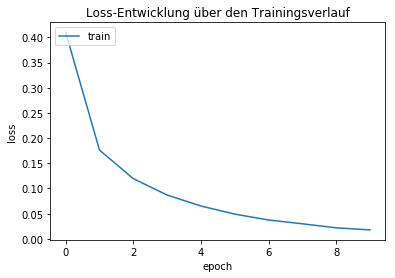

In [67]:
plt.plot(training_history.history['loss'])
#plt.plot(training_history.history['val_loss'])
plt.title('Loss-Entwicklung über den Trainingsverlauf')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [10]:
from keras.utils import plot_model
plot_model(model)